In [ ]:
import os
import requests

file_path = "human-nutrition.pdf"

if not os.path.exists(file_path):
  print("-> File doesn't exist, downloading...")

  url = "https://pressbooks.oer.hawaii.edu/humannutrition2/open/download?type=pdf"

  response = requests.get(url)

  filename = file_path

  if response.status_code==200:
    with open(filename, "wb") as file:
      file.write(response.content)
    print(f"-> File saved successfully with filename: {filename}")
  else:
    print(f"-> Unable to download the file: {response.status_code}")

else:
  print("File already exists.")

File already exists.


In [ ]:
!pip install PyMuPDF

In [ ]:
!pip install tqdm

In [ ]:
import fitz
from tqdm.auto import tqdm

def clean_text(text: str) -> str:
  cleaned_text = text.replace("\n", " ").strip()
  return cleaned_text

def open_read_pdf(path: str) -> list[dict]:
  pdf = fitz.open(path)
  pages_texts = []
  for page_number, page in tqdm(enumerate(pdf)):
    text = page.get_text()
    text = clean_text(text)
    pages_texts.append({
        "page_number": page_number-41,
        "page_char_count": len(text),
        "page_word_count": len(text.split(" ")),
        "page_sentence_count": len(text.split(". ")),
        "page_token_count": len(text)/4, # 1 token ~= 4 characters
        "text": text
    })
  return pages_texts

pages_texts = open_read_pdf(file_path)

pages_texts[:2]

0it [00:00, ?it/s]

[{'page_number': -41,
  'page_char_count': 29,
  'page_word_count': 4,
  'page_sentence_count': 1,
  'page_token_count': 7.25,
  'text': 'Human Nutrition: 2020 Edition'},
 {'page_number': -40,
  'page_char_count': 0,
  'page_word_count': 1,
  'page_sentence_count': 1,
  'page_token_count': 0.0,
  'text': ''}]

In [ ]:
import random

random.sample(pages_texts, k=3)

[{'page_number': -9,
  'page_char_count': 297,
  'page_word_count': 56,
  'page_sentence_count': 3,
  'page_token_count': 74.25,
  'text': 'Skylar Hara  Skylar Hara is an undergraduate student student in the Tropical  Agriculture and the Environment program at the University of  Hawai‘i at Mānoa. She has a growing love for plants and hopes to go  to graduate school to conduct research in the future.  About the Contributors  |  xxxiii'},
 {'page_number': 652,
  'page_char_count': 1271,
  'page_word_count': 208,
  'page_sentence_count': 12,
  'page_token_count': 317.75,
  'text': 'recommendations and sources of trace minerals  Trace minerals are classified as minerals required in the diet each  day in smaller amounts, specifically 100 milligrams or less. \xa0These  include copper, zinc, selenium, iodine, chromium, fluoride,  manganese, molybdenum, and others. \xa0Although trace minerals are  needed in smaller amounts it is important to remember that a  deficiency in a trace mineral can b

In [ ]:
import pandas as pd

df = pd.DataFrame(pages_texts)
df.head()

,page_number,page_char_count,page_word_count,page_sentence_count,page_token_count,text
0,-41,29,4,1,7.25,Human Nutrition: 2020 Edition
1,-40,0,1,1,0.00,
2,-39,320,54,1,80.00,Human Nutrition: 2020 Edition UNIVERSITY OF ...
3,-38,212,32,1,53.00,Human Nutrition: 2020 Edition by University of...
4,-37,797,145,2,199.25,Contents Preface University of Hawai‘i at Mā...


In [ ]:
from spacy.lang.en import English

nlp = English()

nlp.add_pipe("sentencizer")

doc = nlp("I am a human being. I like machine learning. I would also like to work for an org. where i will be at a good position.")

print(list(doc.sents))

[I am a human being., I like machine learning., I would also like to work for an org., where i will be at a good position.]


In [ ]:
for item in tqdm(pages_texts):
  item["sentences"] = list(nlp(item["text"]).sents)
  item["sentences"] = [str(sentence) for sentence in item["sentences"]]
  item["page_sentence_count_spacy"] = len(item["sentences"])

  0%|          | 0/1208 [00:00<?, ?it/s]

In [ ]:
df = pd.DataFrame(pages_texts)
df.head()

,page_number,page_char_count,page_word_count,page_sentence_count,page_token_count,text,sentences,page_sentence_count_spacy
0,-41,29,4,1,7.25,Human Nutrition: 2020 Edition,[Human Nutrition: 2020 Edition],1
1,-40,0,1,1,0.00,,[],0
2,-39,320,54,1,80.00,Human Nutrition: 2020 Edition UNIVERSITY OF ...,[Human Nutrition: 2020 Edition UNIVERSITY OF...,1
3,-38,212,32,1,53.00,Human Nutrition: 2020 Edition by University of...,[Human Nutrition: 2020 Edition by University o...,1
4,-37,797,145,2,199.25,Contents Preface University of Hawai‘i at Mā...,[Contents Preface University of Hawai‘i at M...,2


In [ ]:
df.iloc[600]

,600
page_number,559
page_char_count,863
page_word_count,136
page_sentence_count,8
page_token_count,215.75
text,Image by Allison Calabrese / CC BY 4.0 Kor...
sentences,[Image by Allison Calabrese / CC BY 4.0 Ko...
page_sentence_count_spacy,8


In [ ]:
chunk_size = 10

def create_chunks(input_list: list, chunk_size: int) -> list[list[str]]:
  return [input_list[i : i+chunk_size] for i in range(0, len(input_list), chunk_size)]

test = list(range(25))
create_chunks(test, chunk_size)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [ ]:
for item in tqdm(pages_texts):
  item["sentences_chunks"] = create_chunks(item["sentences"], chunk_size)
  item["sentences_chunks_count"] = len(item["sentences_chunks"])

  0%|          | 0/1208 [00:00<?, ?it/s]

In [ ]:
pages_texts[1115]

{'page_number': 1074,
 'page_char_count': 1748,
 'page_word_count': 284,
 'page_sentence_count': 16,
 'page_token_count': 437.0,
 'text': 'connection to body cues of hunger and fullness and the selection  of foods based on both pleasure and nutrient density.24\xa0 When an  individual is able to disconnect from diet culture and a focus on  weight loss, they are able to eat in ways that support having energy  throughout the day and feel competent around all foods.\xa0 Instead  of an outward focus on counting calories, dietary restriction, and  measuring food portions, intuitive eating teaches a mindfulness  practice of going inward and learning to respond to the cues and  rhythms of the body.\xa0 A review of 22 intervention studies that  compared traditional weight loss to the intuitive eating approach  concluded that the participants in the non-diet groups were able  to stop unhealthy weight controlling behaviors, improve metabolic  fitness and reduce risk factors, increase body satisfa

In [ ]:
df = pd.DataFrame(pages_texts)
df.head()

,page_number,page_char_count,page_word_count,page_sentence_count,page_token_count,text,sentences,page_sentence_count_spacy,sentences_chunks,sentences_chunks_count
0,-41,29,4,1,7.25,Human Nutrition: 2020 Edition,[Human Nutrition: 2020 Edition],1,[[Human Nutrition: 2020 Edition]],1
1,-40,0,1,1,0.00,,[],0,[],0
2,-39,320,54,1,80.00,Human Nutrition: 2020 Edition UNIVERSITY OF ...,[Human Nutrition: 2020 Edition UNIVERSITY OF...,1,[[Human Nutrition: 2020 Edition UNIVERSITY O...,1
3,-38,212,32,1,53.00,Human Nutrition: 2020 Edition by University of...,[Human Nutrition: 2020 Edition by University o...,1,[[Human Nutrition: 2020 Edition by University ...,1
4,-37,797,145,2,199.25,Contents Preface University of Hawai‘i at Mā...,[Contents Preface University of Hawai‘i at M...,2,[[Contents Preface University of Hawai‘i at ...,1


In [ ]:
import re

pages_chunks = []
for item in tqdm(pages_texts):
  for sentence_chunk in item["sentences_chunks"]:
    chunk_dict = {}
    chunk_dict["page_number"] = item["page_number"]
    joined_sentence_chunk = "".join(sentence_chunk).replace("  ", " ").strip()
    joined_sentence_chunk = re.sub(r"\.([A-Z])", r". \1", joined_sentence_chunk) # .A -> . A

    chunk_dict["sentence_chunk"] = joined_sentence_chunk
    chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
    chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])
    chunk_dict["chunk_token_count"] = len(joined_sentence_chunk)/4
    pages_chunks.append(chunk_dict)

len(pages_chunks)

  0%|          | 0/1208 [00:00<?, ?it/s]

1843

In [ ]:
random.sample(pages_chunks, k=1)

[{'page_number': 285,
  'sentence_chunk': 'Sucrose • Sugar ~4 kcal/ g Extracted from either sugar beets or sugar cane, which is then purified and crystallized. It is illegal to sell true raw sugar in the United States because when raw it contains dirt and insect parts, as well as other byproducts. Raw sugar products sold in the United States have actually gone through more than half of the same steps in the refining process as table sugar. Over-consumption has been linked to several health effects such as tooth decay or dental caries and contributes to increased risk for chronic diseases. Honey 3 kcal/g Made from sucrose. Contains nectar of flowering plants. Made by bees. Sucrose is fructose + glucose; however, honey contains more calories than sucrose because honey is denser. *Considered safe for baking and cooking. Infants under twelve months old should not be given honey because their digestive tracts cannot handle the bacteria found in honey.',
  'chunk_char_count': 917,
  'chunk_w

In [ ]:
df = pd.DataFrame(pages_chunks)
df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count
0,-41,Human Nutrition: 2020 Edition,29,4,7.25
1,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00
2,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50
3,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.50
4,-36,Lifestyles and Nutrition University of Hawai‘i...,941,142,235.25


In [ ]:
min_token_length = 30

for row in df[df["chunk_token_count"]<=min_token_length].sample(5).iterrows():
  print(row[1]["chunk_token_count"])

27.75
19.25
21.25
10.5
10.5


In [ ]:
pages_chunks_over_min_token = df[df["chunk_token_count"]>min_token_length].to_dict(orient="records")
pages_chunks_over_min_token[:2]

[{'page_number': -39,
  'sentence_chunk': 'Human Nutrition: 2020 Edition UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN NUTRITION PROGRAM ALAN TITCHENAL, SKYLAR HARA, NOEMI ARCEO CAACBAY, WILLIAM MEINKE-LAU, YA-YUN YANG, MARIE KAINOA FIALKOWSKI REVILLA, JENNIFER DRAPER, GEMADY LANGFELDER, CHERYL GIBBY, CHYNA NICOLE CHUN, AND ALLISON CALABRESE',
  'chunk_char_count': 308,
  'chunk_word_count': 42,
  'chunk_token_count': 77.0},
 {'page_number': -38,
  'sentence_chunk': 'Human Nutrition: 2020 Edition by University of Hawai‘i at Mānoa Food Science and Human Nutrition Program is licensed under a Creative Commons Attribution 4.0 International License, except where otherwise noted.',
  'chunk_char_count': 210,
  'chunk_word_count': 30,
  'chunk_token_count': 52.5}]

In [ ]:
random.sample(pages_chunks_over_min_token, k=1)

[{'page_number': 793,
  'sentence_chunk': 'provide nutrients, phytochemicals, antioxidants, and the extra 3 mg/day of fiber that is recommended during pregnancy. These foods also help to build the placenta and supply energy for the growth of the unborn baby. During pregnancy, extra protein is needed for the synthesis of new maternal and fetal tissues. Protein builds muscle and other tissues, enzymes, antibodies, and hormones in both the mother and the unborn baby. Additional protein also supports increased blood volume and the production of amniotic fluid. The RDA of protein during pregnancy is 71 grams per day, which is 25 grams above the normal recommendation. Protein should be derived from healthy sources, such as lean red meat, poultry, legumes, nuts, seeds, eggs, and fish. Low-fat milk and other dairy products also provide protein, along with calcium and other nutrients. There are no specific recommendations for fats in pregnancy, apart from following normal dietary guidelines. Al

In [ ]:
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2", device="cpu")
sentences = ["The Sentences Transformers library provides an easy and open-source way to create embeddings.",
             "Sentences can be embedded one by one or as a list of strings.",
             "I like dogs!"]

embeddings = embedding_model.encode(sentences)
all_embeddings = dict(zip(sentences, embeddings))

for sentence, embeddings in all_embeddings.items():
  print(f"Sentence: {sentence}")
  print(f"Embeddings: {embeddings}")
  print(" ")

Sentence: The Sentences Transformers library provides an easy and open-source way to create embeddings.
Embeddings: [-2.07982995e-02  3.03164888e-02 -2.01217700e-02  6.86484724e-02
 -2.55256016e-02 -8.47688690e-03 -2.07226767e-04 -6.32377341e-02
  2.81606689e-02 -3.33353691e-02  3.02634258e-02  5.30721582e-02
 -5.03526963e-02  2.62288526e-02  3.33313793e-02 -4.51577716e-02
  3.63044962e-02 -1.37124409e-03 -1.20171495e-02  1.14946980e-02
  5.04510812e-02  4.70856912e-02  2.11913809e-02  5.14606386e-02
 -2.03746315e-02 -3.58889215e-02 -6.67774526e-04 -2.94393878e-02
  4.95859236e-02 -1.05639463e-02 -1.52014298e-02 -1.31762819e-03
  4.48197350e-02  1.56023512e-02  8.60379259e-07 -1.21394393e-03
 -2.37978864e-02 -9.09361639e-04  7.34483032e-03 -2.53931805e-03
  5.23370542e-02 -4.68043797e-02  1.66214667e-02  4.71579507e-02
 -4.15599309e-02  9.01982712e-04  3.60278040e-02  3.42213809e-02
  9.68227014e-02  5.94829097e-02 -1.64984353e-02 -3.51249315e-02
  5.92519017e-03 -7.07903411e-04 -2.410

In [ ]:
# %%time

# embedding_model.to("cpu")

# for item in tqdm(pages_chunks_over_min_token):
#   item["embedding"] = embedding_model.encode(item["sentence_chunk"])

%%time

embedding_model.to("cuda")

for item in tqdm(pages_chunks_over_min_token):
  item["embedding"] = embedding_model.encode(item["sentence_chunk"])

  0%|          | 0/1680 [00:00<?, ?it/s]

CPU times: user 30.4 s, sys: 412 ms, total: 30.8 s
Wall time: 36.1 s


In [ ]:
text_chunks = [item["sentence_chunk"] for item in pages_chunks_over_min_token]
text_chunks[400]

'a diet high in fructose could potentially stimulate fat deposition and weight gain. In human studies, excessive fructose intake has sometimes been associated with weight gain, but results are inconsistent. Moderate fructose intake is not associated with weight gain at all. Moreover, other studies show that some fructose in the diet actually improves glucose metabolism especially in people with Type 2 diabetes.5 In fact, people with diabetes were once advised to use fructose as an alternative sweetener to table sugar. Overall, there is no good evidence that moderate fructose consumption contributes to weight gain and chronic disease. At this time conclusive evidence is not available on whether fructose is any worse than any other added sugar in increasing the risk for obesity, Type 2 diabetes, and cardiovascular disease. Do Low-Carbohydrate Diets Affect Health? Since the early 1990s, marketers of low-carbohydrate diets have bombarded us with the idea that eating fewer carbohydrates pro

In [ ]:
len(text_chunks)

1680

In [ ]:
%%time

embedding_model.to("cuda")

text_chunks_embeddings = embedding_model.encode(text_chunks, batch_size=32, convert_to_tensor=True)

text_chunks_embeddings

CPU times: user 21.5 s, sys: 37.9 ms, total: 21.5 s
Wall time: 22.5 s


tensor([[ 0.0674,  0.0902, -0.0051,  ..., -0.0221, -0.0232,  0.0126],
        [ 0.0552,  0.0592, -0.0166,  ..., -0.0120, -0.0103,  0.0227],
        [ 0.0280,  0.0340, -0.0206,  ..., -0.0054,  0.0213,  0.0313],
        ...,
        [ 0.0771,  0.0098, -0.0122,  ..., -0.0409, -0.0752, -0.0241],
        [ 0.1030, -0.0165,  0.0083,  ..., -0.0574, -0.0283, -0.0295],
        [ 0.0864, -0.0125, -0.0113,  ..., -0.0522, -0.0337, -0.0299]],
       device='cuda:0')

In [ ]:
text_chunks_embeddings_df = pd.DataFrame(pages_chunks_over_min_token)
text_chunks_embeddings_path = "text_chunks_embeddings_df.csv"
text_chunks_embeddings_df.to_csv(text_chunks_embeddings_path, index=False)

In [ ]:
text_chunks_embeddings_df_csv = pd.read_csv(text_chunks_embeddings_path)
text_chunks_embeddings_df_csv.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00,[ 6.74242675e-02 9.02281404e-02 -5.09548886e-...
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50,[ 5.52156419e-02 5.92139773e-02 -1.66167244e-...
2,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.50,[ 2.79801842e-02 3.39813754e-02 -2.06426680e-...
3,-36,Lifestyles and Nutrition University of Hawai‘i...,941,142,235.25,[ 6.82566911e-02 3.81275006e-02 -8.46854132e-...
4,-35,The Cardiovascular System University of Hawai‘...,998,152,249.50,[ 3.30264494e-02 -8.49763490e-03 9.57159605e-...


## Loading the saved embeddings

In [ ]:
import random
import numpy as np
import pandas as pd
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

text_chunks_embeddings_path = "text_chunks_embeddings_df.csv"
text_chunks_embeddings_df_csv = pd.read_csv(text_chunks_embeddings_path)
text_chunks_embeddings_df_csv["embedding"] = text_chunks_embeddings_df_csv["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))
embeddings = torch.tensor(np.stack(text_chunks_embeddings_df_csv["embedding"].to_list(), axis=0), dtype=torch.float32).to(device)

pages_chunks = text_chunks_embeddings_df_csv.to_dict(orient="records")

text_chunks_embeddings_df_csv.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00,"[0.0674242675, 0.0902281404, -0.00509548886, -..."
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50,"[0.0552156419, 0.0592139773, -0.0166167244, -0..."
2,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.50,"[0.0279801842, 0.0339813754, -0.020642668, 0.0..."
3,-36,Lifestyles and Nutrition University of Hawai‘i...,941,142,235.25,"[0.0682566911, 0.0381275006, -0.00846854132, -..."
4,-35,The Cardiovascular System University of Hawai‘...,998,152,249.50,"[0.0330264494, -0.0084976349, 0.00957159605, -..."


In [ ]:
embeddings

tensor([[ 0.0674,  0.0902, -0.0051,  ..., -0.0221, -0.0232,  0.0126],
        [ 0.0552,  0.0592, -0.0166,  ..., -0.0120, -0.0103,  0.0227],
        [ 0.0280,  0.0340, -0.0206,  ..., -0.0054,  0.0213,  0.0313],
        ...,
        [ 0.0771,  0.0098, -0.0122,  ..., -0.0409, -0.0752, -0.0241],
        [ 0.1030, -0.0165,  0.0083,  ..., -0.0574, -0.0283, -0.0295],
        [ 0.0864, -0.0125, -0.0113,  ..., -0.0522, -0.0337, -0.0299]],
       device='cuda:0')

In [ ]:
from sentence_transformers import util, SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2", device=device)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
query = "breast feeding timeline"

print(f"Query: {query}")

query_embeddings = embedding_model.encode(query, convert_to_tensor=True).to(device)

dot_scores = util.dot_score(a=query_embeddings, b=embeddings)[0]

top_k = 5

top_results = torch.topk(dot_scores, k=top_k)
top_results

Query: breast feeding timeline


torch.return_types.topk(
values=tensor([0.6399, 0.6292, 0.6268, 0.6233, 0.5976], device='cuda:0'),
indices=tensor([1160, 1169, 1144, 1138, 1151], device='cuda:0'))

In [ ]:
pages_chunks[1163]

{'page_number': 823,
 'sentence_chunk': 'inhibits milk secretion. Shortly after birth, the expulsion of the placenta triggers progesterone levels to fall, which activates lactation.15 When the infant suckles at the breast, levels of the hormone oxytocin rise to promote the release of breast milk from the breast when the infant suckles, which is known as the milk- ejection reflex. New mothers usually find that their appetite and thirst is greater than before pregnancy; it is recommended that they still focus on nutrient-dense foods to nourish their body and replace their body’s nutrient stores. A conservative rate of weight loss (1-2 pounds per week) during lactation does not usually impact the quantity or quality of breast milk, but maternal deficiencies in some nutrients have been described during lactation. The nutrient content of breastmilk does not change much based upon maternal diet for most nutrients. The RDA for energy is 330 additional Calories during the first six months of l

In [ ]:
import textwrap

def print_wrapped(text, wrap_length=80):
  wrapped_text = textwrap.fill(text, wrap_length)
  print(wrapped_text)

In [ ]:
query = "breast feeding timeline"

print(f"Query: {query}")

print("Result:")
for score, idx in zip(top_results[0], top_results[1]):
  print(f"Score: {score}")
  print("Text: ")
  print_wrapped(pages_chunks[idx]["sentence_chunk"])
  print(f"Page Number: {pages_chunks[idx]['page_number']}")
  print("\n")

Query: breast feeding timeline
Result:
Score: 0.6399365663528442
Text: 
Most mothers can make enough milk for their babies whether they have small or
large breasts. It is normal for a woman to have one breast that is different
than the other in size or shape. During pregnancy, the breasts will normally
increase in size. If a woman does not notice any changes to her breast during
pregnancy, she should discuss this with her healthcare provider or a lactation
consultant. After the birth of the baby, nutritional needs must be met to ensure
that an infant not only survives, but thrives from infancy into childhood.
Breastfeeding provides the fuel a newborn needs for rapid growth and
development. As a result, the WHO recommends that breastfeeding is exclusive (no
other food or drink) for the first six months of an infant’s life. Exclusive
breastfeeding is one of the best ways a mother can support the growth and
protect the health of her infant child. Breast milk contains nearly all of the
nut

In [ ]:
from sentence_transformers import CrossEncoder

reranker = CrossEncoder(model_name_or_path="mixedbread-ai/mxbai-rerank-xsmall-v1")

query = "breast feeding timeline"

print(f"Query: {query}")

documents = {}

print("Result:")
for score, idx in zip(top_results[0], top_results[1]):
  documents[pages_chunks[idx]['page_number']] = pages_chunks[idx]["sentence_chunk"]

pairs = [(query, doc) for doc in documents.values()]

scores = reranker.predict(pairs)

results = zip(documents.keys(), documents.values(), scores)
results = sorted(results, key=lambda x: x[2], reverse=True)

for page, text, score in results:
  print(f"Page: {page}")
  print(f"Sentence:")
  print_wrapped(text)
  print(f"Score: {score}")
  print("\n")

config.json:   0%|          | 0.00/968 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/142M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/970 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

Query: breast feeding timeline
Result:
Page: 816
Sentence:
milk is the best source to fulfill nutritional requirements. An exclusively
breastfed infant does not even need extra water, including in hot climates. A
newborn infant (birth to 28 days) requires feedings eight to twelve times a day
or more. Between 1 and 3 months of age, the breastfed infant becomes more
efficient, and the number of feedings per day often become fewer even though the
amount of milk consumed stays the same. After about six months, infants can
gradually begin to consume solid foods to help meet nutrient needs. Foods that
are added in addition to breastmilk are called complementary foods.
Complementary foods should be nutrient dense to provide optimal nutrition.
Complementary foods include baby meats, vegetables, fruits, infant cereal, and
dairy products such as yogurt, but not infant formula. Infant formula is a
substitute, not a complement to breastmilk. In addition to complementary foods,
the World Health Org

In [ ]:
!pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 27.0 MB/s eta 0:00:00


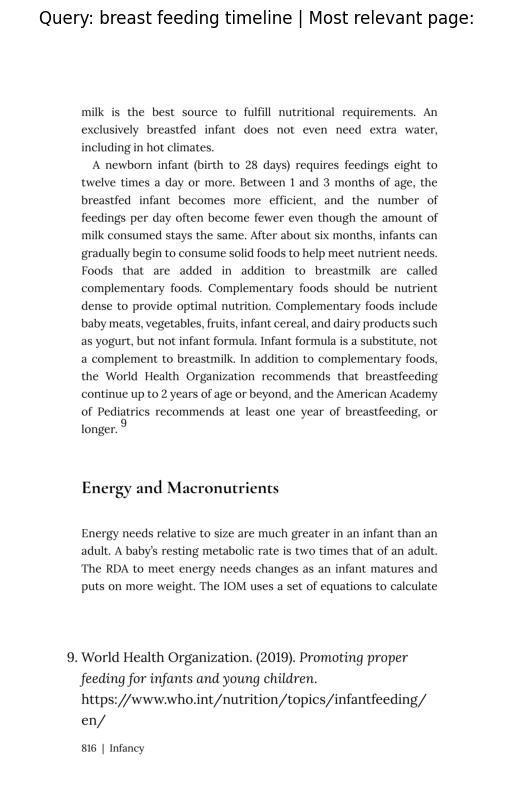

In [ ]:
import fitz

pdf_path = "human-nutrition.pdf"
doc = fitz.open(pdf_path)
page = doc.load_page(816+41)

img = page.get_pixmap(dpi=300)
img.save("page_816.png")

doc.close()

img_array = np.frombuffer(img.samples_mv, dtype=np.uint8).reshape((img.h, img.w, img.n))

import matplotlib.pyplot as plt

plt.figure(figsize=(13, 10))
plt.imshow(img_array)
plt.title(f"Query: {query} | Most relevant page: ")
plt.axis("off")
plt.show()

In [ ]:
import torch

def dot_product(vector1, vector2):
  return torch.dot(vector1, vector2)

def cosine_similarity(vector1, vector2):
  dot_product = torch.dot(vector1, vector2)
  norm_vector1 = torch.norm(vector1)
  norm_vector2 = torch.norm(vector2)
  return dot_product / (norm_vector1 * norm_vector2)

vector1 = torch.tensor([1, 2, 3], dtype=torch.float32)
vector2 = torch.tensor([1, 2, 3], dtype=torch.float32)
vector3 = torch.tensor([4, 5, 6], dtype=torch.float32)
vector4 = torch.tensor([-1, -2, -3], dtype=torch.float32)

print(f"Dot Product: {dot_product(vector1, vector2)}")
print(f"Dot Product: {dot_product(vector1, vector3)}")
print(f"Dot Product: {dot_product(vector1, vector4)}")

print(f"Cosine Similarity: {cosine_similarity(vector1, vector2)}")
print(f"Cosine Similarity: {cosine_similarity(vector1, vector3)}")
print(f"Cosine Similarity: {cosine_similarity(vector1, vector4)}")

Dot Product: 14.0
Dot Product: 32.0
Dot Product: -14.0
Cosine Similarity: 0.9999999403953552
Cosine Similarity: 0.9746317863464355
Cosine Similarity: -0.9999999403953552


In [ ]:
from sentence_transformers import util, SentenceTransformer, CrossEncoder
from timeit import default_timer as timer
import textwrap

def get_relevant_resources(query: str,
                           embeddings: torch.tensor,
                           model: SentenceTransformer=embedding_model,
                           n_resources_to_return: int=5,
                           print_time: bool=True):
  query_embeddings = embedding_model.encode(query, convert_to_tensor=True)

  start_time = timer()
  dot_scores = util.dot_score(a=query_embeddings, b=embeddings)[0]
  end_time = timer()

  if print_time:
    print(f"-> Time taken to get scores for ({len(embeddings)} embeddings): {end_time-start_time}")

  values, indices = torch.topk(dot_scores, k=n_resources_to_return)

  return values, indices

def print_wrapped(text, wrap_length=80):
  wrapped_text = textwrap.fill(text, wrap_length)
  print(wrapped_text)


def print_results_and_scores(query: str,
                             embeddings: torch.tensor,
                             n_resources_to_return: int=5):
  reranker = CrossEncoder(model_name_or_path="mixedbread-ai/mxbai-rerank-xsmall-v1")

  documents = {}

  scores, indices = get_relevant_resources(query=query, embeddings=embeddings, n_resources_to_return=n_resources_to_return, print_time=False)

  for score, idx in zip(scores, indices):
    documents[pages_chunks[idx]['page_number']] = pages_chunks[idx]["sentence_chunk"]

  pairs = [(query, doc) for doc in documents.values()]

  scores = reranker.predict(pairs)

  results = zip(indices, documents.keys(), documents.values(), scores)
  results = sorted(results, key=lambda x: x[3], reverse=True)

  # for page, text, score in results:
  #   print(f"Page: {page}")
  #   print(f"Sentence:")
  #   print_wrapped(text)
  #   print(f"Score: {score}")
  #   print("\n")

  reranked_indices = torch.tensor([r[0] for r in results], dtype=torch.int64)
  reranked_scores = torch.tensor([r[3] for r in results], dtype=torch.float32)

  return reranked_scores, reranked_indices

In [ ]:
query = "foods high in fiber"

# print(get_relevant_resources(query="food high in fiber", embeddings=embeddings))
print(print_results_and_scores(query=query, embeddings=embeddings))

(tensor([0.8282, 0.7954, 0.7477, 0.4442, 0.3585]), tensor([ 360,  418,  358,  412, 1047]))


### Loading LLM

In [ ]:
import torch

gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes / (2**30))
print(f"Available GPU memory: {gpu_memory_gb} GB")

Available GPU memory: 15 GB


In [ ]:
!pip install bitsandbytes accelerate

In [ ]:
# Note: the following is Gemma focused, however, there are more and more LLMs of the 2B and 7B size appearing for local use.
if gpu_memory_gb < 5.1:
    print(f"Your available GPU memory is {gpu_memory_gb}GB, you may not have enough memory to run a Gemma LLM locally without quantization.")
elif gpu_memory_gb < 8.1:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in 4-bit precision.")
    use_quantization_config = True
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb < 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.")
    use_quantization_config = False
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb > 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommend model: Gemma 7B in 4-bit or float16 precision.")
    use_quantization_config = False
    model_id = "google/gemma-7b-it"

print(f"use_quantization_config set to: {use_quantization_config}")
print(f"model_id set to: {model_id}")

GPU memory: 15 | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.
use_quantization_config set to: False
model_id set to: google/gemma-2b-it


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers.utils import is_flash_attn_2_available

from transformers import BitsAndBytesConfig
quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         bnb_4bit_compute_dtype=torch.float16)

if(is_flash_attn_2_available() and torch.cuda.get_device_capability(0)[0] >= 8):
  attn_implementation = "flash_attn_2"
else:
  attn_implementation = "sdpa"

model_id = "meta-llama/Llama-3.2-1B-Instruct"

tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path = model_id)

# To remove the warning: Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
if tokenizer.pad_token_id is None:
    tokenizer.pad_token = tokenizer.eos_token

llm_model = AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path = model_id,
                                                 torch_dtype=torch.float16,
                                                 quantization_config=quantization_config if use_quantization_config else None,
                                                 low_cpu_mem_usage=False,
                                                 attn_implementation=attn_implementation)

# To remove the warning: Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
llm_model.config.pad_token_id = llm_model.config.eos_token_id
llm_model.generation_config.pad_token_id = tokenizer.pad_token_id

if not use_quantization_config:
  llm_model.to("cuda")

In [ ]:
# import torch
# torch.cuda.get_device_capability(0)

In [ ]:
llm_model

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 2048)
    (layers): ModuleList(
      (0-15): 16 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2048, out_features=512, bias=False)
          (v_proj): Linear(in_features=2048, out_features=512, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=2048, out_features=8192, bias=False)
          (up_proj): Linear(in_features=2048, out_features=8192, bias=False)
          (down_proj): Linear(in_features=8192, out_features=2048, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
      )
    )
    (norm): LlamaRMSNorm((2048,), eps=1e-05)
    (rotary_emb):

In [ ]:
def get_model_params(model: torch.nn.Module):
  return sum([p.numel() for p in model.parameters()])

get_model_params(llm_model)

1235814400

In [ ]:
def get_model_mem_size(model: torch.nn.Module):
    # Get model parameters and buffer sizes
    mem_params = sum([param.nelement() * param.element_size() for param in model.parameters()])
    mem_buffers = sum([buf.nelement() * buf.element_size() for buf in model.buffers()])

    # Calculate various model sizes
    model_mem_bytes = mem_params + mem_buffers # in bytes
    model_mem_mb = model_mem_bytes / (1024**2) # in megabytes
    model_mem_gb = model_mem_bytes / (1024**3) # in gigabytes

    return {"model_mem_bytes": model_mem_bytes,
            "model_mem_mb": round(model_mem_mb, 2),
            "model_mem_gb": round(model_mem_gb, 2)}

get_model_mem_size(llm_model)

{'model_mem_bytes': 2471628928, 'model_mem_mb': 2357.13, 'model_mem_gb': 2.3}

In [ ]:
input_text = "How long should infants be breastfed for?"
print(f"Query: {input_text}")

template = [
    {
        "role": "user",
        "content": input_text
    }
]

prompt = tokenizer.apply_chat_template(conversation=template, tokenize=False, add_generation_prompt=True)
print(f"Prompt: {prompt}")

Query: How long should infants be breastfed for?
Prompt: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 09 Oct 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

How long should infants be breastfed for?<|eot_id|><|start_header_id|>assistant<|end_header_id|>




In [ ]:
tokenizer

PreTrainedTokenizerFast(name_or_path='meta-llama/Llama-3.2-1B-Instruct', vocab_size=128000, model_max_length=131072, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|begin_of_text|>', 'eos_token': '<|eot_id|>', 'pad_token': '<|eot_id|>'}, clean_up_tokenization_spaces=True, added_tokens_decoder={
	128000: AddedToken("<|begin_of_text|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128001: AddedToken("<|end_of_text|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128002: AddedToken("<|reserved_special_token_0|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128003: AddedToken("<|reserved_special_token_1|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128004: AddedToken("<|finetune_right_pad_id|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	128005: AddedToken("<|res

In [ ]:
%%time

input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

output = llm_model.generate(**input_ids, max_new_tokens=256)

print(f"Model output: {output[0]}\n")

Model output: tensor([128000, 128000, 128006,   9125, 128007,    271,  38766,   1303,  33025,
          2696,     25,   6790,    220,   2366,     18,    198,  15724,   2696,
            25,    220,   2545,   5020,    220,   2366,     20,    271, 128009,
        128006,    882, 128007,    271,   4438,   1317,   1288,  42534,    387,
         17659,  52223,    369,     30, 128009, 128006,  78191, 128007,    271,
           791,   3778,  16192,    315,  99871,    320,  84016,      8,  40912,
         65864,    369,    520,   3325,    279,   1176,   4848,   4038,    315,
           459,  31383,    596,   2324,     11,    323,   8738,  65864,    709,
           311,    220,    717,   4038,    477,   1524,   7953,     13,   5810,
           596,    264,    810,  11944,  31085,   1473,     16,     13,   3146,
         71505,  65864,  96618,  49380,  65864,   3445,    430,    279,  31383,
          5334,   1193,  17659,  14403,     11,    323,    814,    527,    539,
          2728,    904,   

In [ ]:
decoded_output = tokenizer.decode(output[0])

print(decoded_output)

<|begin_of_text|><|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 09 Oct 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

How long should infants be breastfed for?<|eot_id|><|start_header_id|>assistant<|end_header_id|>

The American Academy of Pediatrics (AAP) recommends breastfeeding for at least the first six months of an infant's life, and continued breastfeeding up to 12 months or even beyond. Here's a more detailed breakdown:

1. **Exclusive breastfeeding**: Exclusive breastfeeding means that the infant gets only breast milk, and they are not given any other liquids or foods, including formula or other beverages.
2. **Duration**: The AAP recommends breastfeeding for at least 6 months, but the exact duration can vary depending on individual circumstances. Here are some general guidelines:
   - **0-3 months**: Breast milk is sufficient for the first 3 months.
   - **4-6 months**: Breast milk is still the primary 

In [ ]:
# Nutrition-style questions generated with GPT4
gpt4_questions = [
    "What are the macronutrients, and what roles do they play in the human body?",
    "How do vitamins and minerals differ in their roles and importance for health?",
    "Describe the process of digestion and absorption of nutrients in the human body.",
    "What role does fibre play in digestion? Name five fibre containing foods.",
    "Explain the concept of energy balance and its importance in weight management."
]

# Manually created question list
manual_questions = [
    "How often should infants be breastfed?",
    "What are symptoms of pellagra?",
    "How does saliva help with digestion?",
    "What is the RDI for protein per day?",
    "water soluble vitamins"
]

query_list = gpt4_questions + manual_questions

In [ ]:
def prompt_formatter(query: str,
                     context_items: list[dict]) -> str:
  context = "- " + "\n- ".join([item["sentence_chunk"] for item in context_items])

  base_prompt = """Based on the following context items, please answer the query.
Give yourself room to think by extracting relevant passages from the context before answering the query.
Don't return the thinking, only return the answer.
Make sure your answers are as explanatory as possible.
Use the following examples as reference for the ideal answer style.
\nExample 1:
Query: What are the fat-soluble vitamins?
Answer: The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with fats in the diet and can be stored in the body's fatty tissue and liver for later use. Vitamin A is important for vision, immune function, and skin health. Vitamin D plays a critical role in calcium absorption and bone health. Vitamin E acts as an antioxidant, protecting cells from damage. Vitamin K is essential for blood clotting and bone metabolism.
\nExample 2:
Query: What are the causes of type 2 diabetes?
Answer: Type 2 diabetes is often associated with overnutrition, particularly the overconsumption of calories leading to obesity. Factors include a diet high in refined sugars and saturated fats, which can lead to insulin resistance, a condition where the body's cells do not respond effectively to insulin. Over time, the pancreas cannot produce enough insulin to manage blood sugar levels, resulting in type 2 diabetes. Additionally, excessive caloric intake without sufficient physical activity exacerbates the risk by promoting weight gain and fat accumulation, particularly around the abdomen, further contributing to insulin resistance.
\nExample 3:
Query: What is the importance of hydration for physical performance?
Answer: Hydration is crucial for physical performance because water plays key roles in maintaining blood volume, regulating body temperature, and ensuring the transport of nutrients and oxygen to cells. Adequate hydration is essential for optimal muscle function, endurance, and recovery. Dehydration can lead to decreased performance, fatigue, and increased risk of heat-related illnesses, such as heat stroke. Drinking sufficient water before, during, and after exercise helps ensure peak physical performance and recovery.
\nNow use the following context items to answer the user query:
{context}
\nRelevant passages: <extract relevant passages from the context here>
User query: {query}
Answer:"""

  base_prompt = base_prompt.format(context=context, query=query)

  dialogue_template = [
        {"role": "user",
        "content": base_prompt}
    ]

  prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                        tokenize=False,
                                        add_generation_prompt=True)

  return prompt

query = random.choice(query_list)
print(f"Query: {query}")

scores, indices = get_relevant_resources(query=query, embeddings=embeddings)

context_items = [pages_chunks[idx] for idx in indices]

prompt = prompt_formatter(query=query, context_items=context_items)
print(f"Prompt: {prompt}")

Query: How does saliva help with digestion?
-> Time taken to get scores for (1680 embeddings): 0.00010094999970533536
Prompt: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 09 Oct 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Based on the following context items, please answer the query.
Give yourself room to think by extracting relevant passages from the context before answering the query.
Don't return the thinking, only return the answer.
Make sure your answers are as explanatory as possible.
Use the following examples as reference for the ideal answer style.

Example 1:
Query: What are the fat-soluble vitamins?
Answer: The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with fats in the diet and can be stored in the body's fatty tissue and liver for later use. Vitamin A is important for vision, immune function, and skin health. Vitamin D plays a 

In [ ]:
%%time

input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

outputs = llm_model.generate(**input_ids, temperature=0.7, do_sample=True, max_new_tokens=256)

output_text = tokenizer.decode(outputs[0])

print(f"Query: {query}")
print(f"RAG Output: {output_text.replace(prompt, '')}")

Query: How does saliva help with digestion?
RAG Output: <|begin_of_text|>Saliva helps with digestion by acting as a buffer, which means it neutralizes stomach acid and creates an environment that is suitable for chemical digestion to occur. It also contains enzymes that break down carbohydrates into smaller components, such as salivary amylase, which breaks the bonds between monomeric sugar units.<|eot_id|>
CPU times: user 2.64 s, sys: 0 ns, total: 2.64 s
Wall time: 3.46 s


In [ ]:
def ask(query: str,
        temperature: float=0.7,
        max_new_tokens: int=256,
        format_answer_text: bool=True,
        return_answer_only: bool=True):

  scores, indices = print_results_and_scores(query=query, embeddings=embeddings)

  context_items = [pages_chunks[i] for i in indices]

  for i, item in enumerate(context_items):
    item["score"] = scores[i].cpu()

  prompt = prompt_formatter(query=query, context_items=context_items)

  input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

  outputs = llm_model.generate(**input_ids,
                                temperature=temperature,
                                do_sample=True,
                                max_new_tokens=max_new_tokens)

  output_text = tokenizer.decode(outputs[0])

  if format_answer_text:
    output_text = output_text.replace(prompt, "").replace("<|begin_of_text|>", "").replace("<|eot_id|>", "").replace("Based on the context, the", "The")

  if return_answer_only:
    return output_text

  return output_text, context_items

In [ ]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

# query = random.choice(query_list)
query = "What role does fibre play in digestion? Name five fibre containing foods."
print(f"Query: {query}")
print(f"RAG Answer: {ask(query, temperature=0.2, return_answer_only=False)}")

Query: What role does fibre play in digestion? Name five fibre containing foods.
RAG Answer: ('Fiber plays a crucial role in digestion by:\n\n- Increasing the rise in blood glucose after eating, which is slower and less, thereby reducing the risk of weight gain and chronic diseases such as Type 2 diabetes.\n- Providing nutrients to the colon, where it is broken down by bacteria, releasing short-chain fatty acids that nourish colonic cells, inhibit colonic inflammation, and stimulate the immune system.\n- Increasing stool bulk and softness, facilitating feces elimination.\n- Providing a source of energy for the body, particularly for the colon, which is a major site of fermentation.\n- Supporting the health of the gut microbiome by promoting the growth of beneficial bacteria.', [{'page_number': 246, 'sentence_chunk': 'Image by Allison Calabrese / CC BY 4.0 starches yielding more energy than insoluble fibers. Since dietary fiber is digested much less in the gastrointestinal tract than ot